In [1]:
# Import des Librairies :

#Librairie d'analyse
import numpy as np
import pandas as pd

#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

#pd.options.display.max_columns = None
#pd.options.display.max_rows = None

#librairie de visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objects as go

# Pour supprimer les warnings :
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
import pingouin as pg

/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def pourcentage_valeurs_manquantes(data=pd.DataFrame):
    """
    Permet d'avoir un % de cellules manquantes.

    Parameters :
    ----------
    data: :class: 'Dataframe'
    DataFrame avec le pourcentage de données manquantes.

    """
    # avec un print possibilité d'avoir une visu par colonne
    somme = 0
    for i in list(data.columns):
        somme += data[i].isna().sum()
    return round((somme / (data.shape[0]*data.shape[1]))*100,2)

In [3]:
df = pd.read_csv('P3_non_standardiser.csv')

In [4]:
print(f"Le pourcentage de valeur manquantes est de :",pourcentage_valeurs_manquantes(df),"%")

Le pourcentage de valeur manquantes est de : 0.0 %


In [5]:
display(df.head())
display(df.describe())
display(df.dtypes)
display(df.shape)

,PrimaryPropertyType,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,Real_GFA,...,x2_Self-Storage Facility,x2_Social/Meeting Hall,x2_Strip Mall,x2_Supermarket/Grocery Store,x2_Swimming Pool,x2_Vocational School,x2_Worship Facility,Taux_Elec,Taux_Gaz,Taux_Steam
0,Hotel,DOWNTOWN,47.61220,-122.33799,1.0,12,60.0,7226362.5,249.98,88434.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.55,0.18,0.28
1,Hotel,DOWNTOWN,47.61317,-122.33393,1.0,11,61.0,8387933.0,295.86,103566.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.39,0.61,0.00
2,Hotel,DOWNTOWN,47.61393,-122.33810,1.0,41,43.0,72587024.0,2089.28,756493.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.68,0.02,0.30
3,Hotel,DOWNTOWN,47.61412,-122.33664,1.0,10,56.0,6794584.0,286.43,61320.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.41,0.27,0.33
4,Hotel,DOWNTOWN,47.61375,-122.34047,1.0,18,75.0,14172606.0,505.01,191454.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.38,0.62,0.00


,Latitude,Longitude,NumberofBuildings,NumberofFloors,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,Real_GFA,Age_du_batiment,x0_Adult Education,...,x2_Self-Storage Facility,x2_Social/Meeting Hall,x2_Strip Mall,x2_Supermarket/Grocery Store,x2_Swimming Pool,x2_Vocational School,x2_Worship Facility,Taux_Elec,Taux_Gaz,Taux_Steam
count,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1.513000e+03,1513.000000,1.513000e+03,1513.000000,1513.000000,...,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000
mean,47.616387,-122.333480,1.180436,4.241904,66.172505,8.912720e+06,195.488929,1.223827e+05,54.295440,0.001322,...,0.001322,0.004627,0.000661,0.000661,0.006609,0.000661,0.000661,0.698566,0.275003,0.023014
std,0.047339,0.023374,3.071862,6.775962,23.529757,3.163718e+07,787.619884,3.160851e+05,32.563927,0.036346,...,0.036346,0.067884,0.025709,0.025709,0.081056,0.025709,0.025709,0.265845,0.265361,0.095082
min,47.509590,-122.411820,0.000000,0.000000,1.000000,5.713320e+04,-0.800000,0.000000e+00,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.340000,0.000000,0.000000
25%,47.586860,-122.342950,1.000000,1.000000,60.000000,1.244150e+06,20.640000,2.884100e+04,28.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.490000,0.000000,0.000000
50%,47.612670,-122.333050,1.000000,2.000000,71.000000,2.726369e+06,49.790000,4.817600e+04,51.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.700000,0.230000,0.000000
75%,47.649090,-122.322640,1.000000,4.000000,79.000000,7.273156e+06,147.490000,1.040990e+05,86.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.490000,0.000000
max,47.733870,-122.261800,111.000000,99.000000,100.000000,8.739237e+08,16870.980000,9.320156e+06,116.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.770000


PrimaryPropertyType      object
Neighborhood             object
Latitude                float64
Longitude               float64
NumberofBuildings       float64
                         ...   
x2_Vocational School    float64
x2_Worship Facility     float64
Taux_Elec               float64
Taux_Gaz                float64
Taux_Steam              float64
Length: 151, dtype: object

(1513, 151)

In [6]:
import scipy.stats as stats
import scipy as st
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
from scipy.stats import ks_2samp
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler # classe pour standardisation
from sklearn import preprocessing
from sklearn import decomposition

In [8]:
df.columns.tolist()

['PrimaryPropertyType',
 'Neighborhood',
 'Latitude',
 'Longitude',
 'NumberofBuildings',
 'NumberofFloors',
 'ENERGYSTARScore',
 'SiteEnergyUse(kBtu)',
 'TotalGHGEmissions',
 'Real_GFA',
 'Age_du_batiment',
 'x0_Adult Education',
 'x0_Automobile Dealership',
 'x0_Bank Branch',
 'x0_College/University',
 'x0_Courthouse',
 'x0_Data Center',
 'x0_Distribution Center',
 'x0_Financial Office',
 'x0_Fire Station',
 'x0_Fitness Center/Health Club/Gym',
 'x0_Food Service',
 'x0_Hospital (General Medical & Surgical)',
 'x0_Hotel',
 'x0_K-12 School',
 'x0_Laboratory',
 'x0_Library',
 'x0_Lifestyle Center',
 'x0_Manufacturing/Industrial Plant',
 'x0_Medical Office',
 'x0_Movie Theater',
 'x0_Museum',
 'x0_Non-Refrigerated Warehouse',
 'x0_Office',
 'x0_Other',
 'x0_Other - Education',
 'x0_Other - Entertainment/Public Assembly',
 'x0_Other - Lodging/Residential',
 'x0_Other - Mall',
 'x0_Other - Public Services',
 'x0_Other - Recreation',
 'x0_Other - Restaurant/Bar',
 'x0_Other - Services',
 'x

In [9]:
categorical_features = df.select_dtypes(['object'])
numerical_features = df.select_dtypes(['float64','int64'])

Features = numerical_features.columns

In [10]:
# Suppression de la 2e colonne à interpréter :
numerical_features.drop(columns=['TotalGHGEmissions'],inplace=True)

In [11]:
# Supprimer les données inférieur ou égal à 0 :
numerical_features.drop(numerical_features[numerical_features.Real_GFA <= 0].index, axis = 0, inplace = True)

In [12]:
#numerical_features = pd.concat([numerical_features,one_hot],axis=1)
numerical_features

,Latitude,Longitude,NumberofBuildings,NumberofFloors,ENERGYSTARScore,SiteEnergyUse(kBtu),Real_GFA,Age_du_batiment,x0_Adult Education,x0_Automobile Dealership,...,x2_Self-Storage Facility,x2_Social/Meeting Hall,x2_Strip Mall,x2_Supermarket/Grocery Store,x2_Swimming Pool,x2_Vocational School,x2_Worship Facility,Taux_Elec,Taux_Gaz,Taux_Steam
0,47.61220,-122.33799,1.0,12,60.0,7.226362e+06,88434.0,89,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.55,0.18,0.28
1,47.61317,-122.33393,1.0,11,61.0,8.387933e+06,103566.0,20,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.39,0.61,0.00
2,47.61393,-122.33810,1.0,41,43.0,7.258702e+07,756493.0,47,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.68,0.02,0.30
3,47.61412,-122.33664,1.0,10,56.0,6.794584e+06,61320.0,90,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.41,0.27,0.33
4,47.61375,-122.34047,1.0,18,75.0,1.417261e+07,191454.0,36,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.38,0.62,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,47.54067,-122.37441,1.0,1,71.0,9.320821e+05,18261.0,34,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.68,0.32,0.00
1509,47.59625,-122.32283,1.0,1,71.0,9.502762e+05,16000.0,12,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.42,0.58,0.00
1510,47.63644,-122.35784,1.0,1,71.0,5.765898e+06,13157.0,42,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.31,0.69,0.00
1511,47.52832,-122.32431,1.0,1,71.0,7.194712e+05,13586.0,27,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.48,0.52,0.00


In [13]:
y = numerical_features['SiteEnergyUse(kBtu)']
X = numerical_features.drop(['SiteEnergyUse(kBtu)'],axis=1)

In [14]:
y = np.log(y)

In [15]:
X_train, X_test, y_train, y_test = \
train_test_split(X,
                 y,
                 test_size=0.33, # 33% des données dans le jeu de test
                 random_state = 0
                )

In [16]:
import math
# Centrage et Réduction
col = X_test.columns
std_scale = StandardScaler().fit(X_train)
X_train_scaled = std_scale.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=col, index=X_train.index )
X_test_scaled = std_scale.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=col, index=X_test.index)
#y_train_log = np.exp(y_train) a tester 
#y_test_log = np.exp(y_test) a tester

In [17]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
import math # pour le RMSE
from sklearn.metrics import r2_score

# Ridge :

In [18]:
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

# define model

model = Ridge(alpha=1.0, random_state=0)
model.fit(X_train_scaled, y_train)

# define model evaluation method
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=0)
# evaluate model
scores = cross_val_score(model,X_train_scaled, y_train, scoring='r2', cv=cv, n_jobs=-1)
# force scores to be positive and mean
scores = absolute(scores).mean()
print("-"*53)
print("Test  R^2 Score : ", model.score(X_test_scaled, y_test))
print("Train R^2 Score : ", model.score(X_train_scaled, y_train))
print("-"*53)

-----------------------------------------------------
Test  R^2 Score :  0.5568533821107553
Train R^2 Score :  0.6975267413810149
-----------------------------------------------------


In [19]:
"""from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

model = Ridge(random_state=0)

params_Ridge = {'alpha': [1,0.1,0.01,0.001,0.0001,0] ,
                "fit_intercept": [True, False],
                "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
               }
Ridge_GS = GridSearchCV(model, param_grid=params_Ridge, n_jobs=-1)
Ridge_GS.fit(X_train,y_train)
display(Ridge_GS.best_params_)


Ridgeregression = Ridge(random_state=0, **Ridge_GS.best_params_)
Train_score = cross_val_score(estimator=Ridgeregression, X=X_train, y=y_train, cv=5)
display(Train_score.mean()) # => Score de train

Ridgeregression.fit(X_train,y_train)
Ridgeregression.score(X_test,y_test) # => Score de test"""

'from sklearn.linear_model import Ridge\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.model_selection import cross_val_score\n\nmodel = Ridge(random_state=0)\n\nparams_Ridge = {\'alpha\': [1,0.1,0.01,0.001,0.0001,0] ,\n                "fit_intercept": [True, False],\n                "solver": [\'svd\', \'cholesky\', \'lsqr\', \'sparse_cg\', \'sag\', \'saga\']\n               }\nRidge_GS = GridSearchCV(model, param_grid=params_Ridge, n_jobs=-1)\nRidge_GS.fit(X_train,y_train)\ndisplay(Ridge_GS.best_params_)\n\n\nRidgeregression = Ridge(random_state=0, **Ridge_GS.best_params_)\nTrain_score = cross_val_score(estimator=Ridgeregression, X=X_train, y=y_train, cv=5)\ndisplay(Train_score.mean()) # => Score de train\n\nRidgeregression.fit(X_train,y_train)\nRidgeregression.score(X_test,y_test) # => Score de test'

In [20]:
y_predict = model.predict(X_test_scaled)
Score = {}
Score['Ridge'] = {'r2': r2_score(y_test, y_predict),
                  'Training_score' :r2_score(y_train, model.predict(X_train_scaled)),
                  'MAE' : mean_absolute_error(y_test, y_predict),
                  'MSE' : mean_squared_error(y_test, y_predict, squared=True),
                  'MSLE' : mean_squared_log_error(y_test, y_predict, squared=True),
                  'RMSE' : mean_squared_error(y_test, y_predict, squared=False),
                  'RMSLE' : mean_squared_log_error(y_test, y_predict, squared=False),
                  'Cross_validate' : (cross_val_score(model, X_train_scaled, y_train, cv=5)).mean(),
                 # 'Time_process' : round(model.cv_results_['mean_fit_time'].max(), 3)
                 }
Score

{'Ridge': {'r2': 0.5568533821107553,
  'Training_score': 0.6975267413810149,
  'MAE': 0.6637064436069302,
  'MSE': 0.7448479244755021,
  'MSLE': 0.002932792473681208,
  'RMSE': 0.8630457255994621,
  'RMSLE': 0.05415526265914706,
  'Cross_validate': 0.1197908321881099}}

## Visualisation :

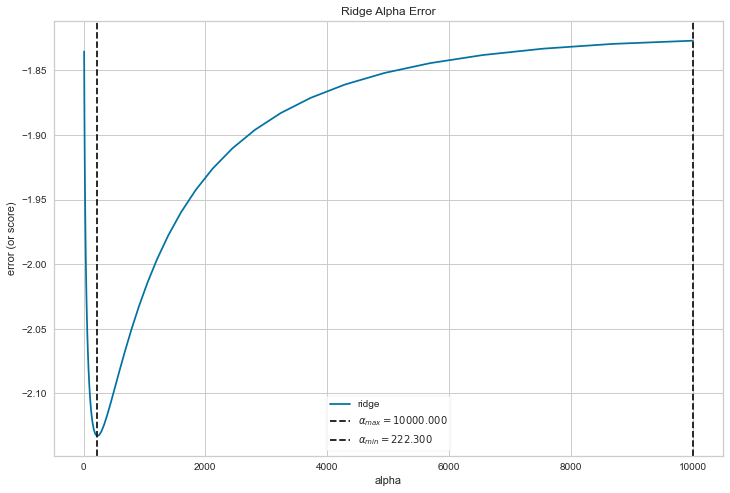

<AxesSubplot:title={'center':'Ridge Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [21]:
from yellowbrick.regressor import ManualAlphaSelection
# Instantiate the visualizer
alphas = np.logspace(1, 4, 50)
visualizer = ManualAlphaSelection(
    Ridge(),
    alphas=alphas,
    cv=5,
    scoring="neg_mean_squared_error"
)
plt.figure(figsize=(12,8))
visualizer.fit(X_train, y_train)
visualizer.show()

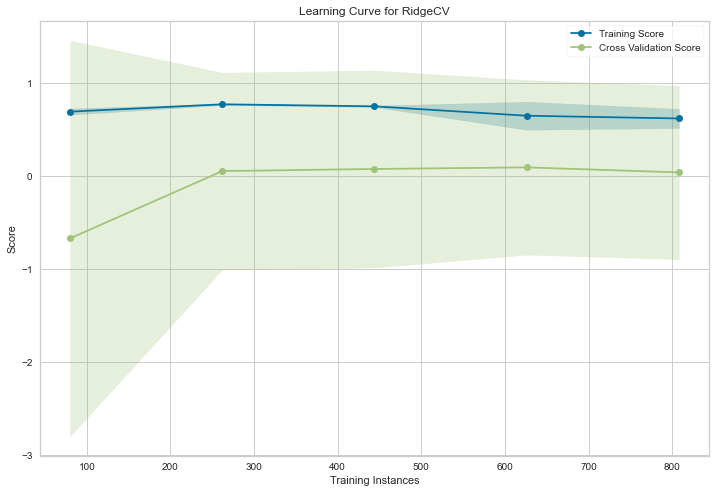

<AxesSubplot:title={'center':'Learning Curve for RidgeCV'}, xlabel='Training Instances', ylabel='Score'>

In [22]:
from yellowbrick.model_selection import LearningCurve
from sklearn.linear_model import RidgeCV
# Instantiate the regression model and visualizer
model = RidgeCV()
visualizer = LearningCurve(model, scoring='r2')
plt.figure(figsize=(12,8))
visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

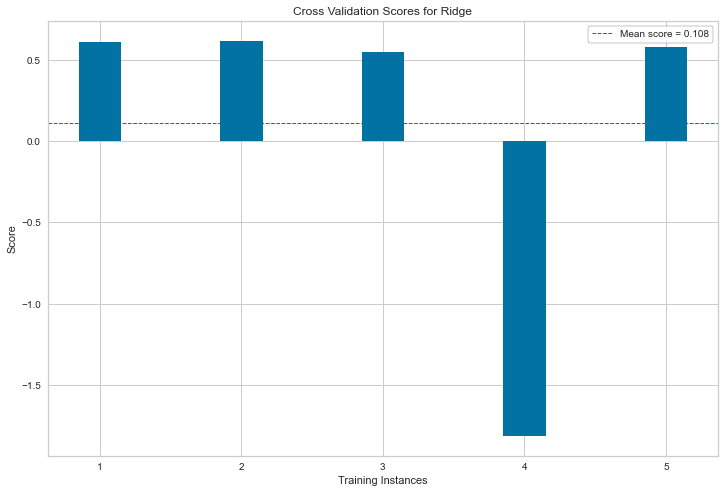

<AxesSubplot:title={'center':'Cross Validation Scores for Ridge'}, xlabel='Training Instances', ylabel='Score'>

In [23]:
from sklearn.linear_model import Ridge
from yellowbrick.model_selection import CVScores

# Instantiate the regression model and visualizer
cv =5

model = Ridge()
visualizer = CVScores(model, cv=cv, scoring='r2')
plt.figure(figsize=(12,8))
visualizer.fit(X_train, y_train)      # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

# Lasso :

In [24]:
from sklearn import linear_model
from sklearn.linear_model import Lasso
# define model
model = Lasso(alpha=1.0)
model.fit(X_train_scaled, y_train)
# define model evaluation method
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=0)
# evaluate model
scores = cross_val_score(model, X_train_scaled, y_train, scoring='r2', cv=cv, n_jobs=-1, verbose=3)
# force scores to be positive and mean
scores = absolute(scores).mean()
print("-"*53)
print("Test  R^2 Score : ", model.score(X_test_scaled, y_test))
print("Train R^2 Score : ", model.score(X_train_scaled, y_train))
print("-"*53)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished


-----------------------------------------------------
Test  R^2 Score :  -0.00021789135266292448
Train R^2 Score :  0.0
-----------------------------------------------------


In [25]:
"""from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

model = Lasso(random_state=0)

params_Lasso = {'alpha': [1,0.1,0.01,0.001,0.0001,0] ,
                "fit_intercept": [True, False],
                #"solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
               }
Lasso_GS = GridSearchCV(model, param_grid=params_Lasso, n_jobs=-1)
Lasso_GS.fit(X_train,y_train)
display(Lasso_GS.best_params_)


Lassoregression = Lasso(random_state=0, **Lasso_GS.best_params_)
Train_score = cross_val_score(estimator=Lassoregression, X=X_train, y=y_train, cv=5)
display(Train_score.mean()) # => Score de train

Lassoregression.fit(X_train,y_train)
Lassoregression.score(X_test,y_test) # => Score de test"""

'from sklearn.linear_model import Lasso\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.model_selection import cross_val_score\n\nmodel = Lasso(random_state=0)\n\nparams_Lasso = {\'alpha\': [1,0.1,0.01,0.001,0.0001,0] ,\n                "fit_intercept": [True, False],\n                #"solver": [\'svd\', \'cholesky\', \'lsqr\', \'sparse_cg\', \'sag\', \'saga\']\n               }\nLasso_GS = GridSearchCV(model, param_grid=params_Lasso, n_jobs=-1)\nLasso_GS.fit(X_train,y_train)\ndisplay(Lasso_GS.best_params_)\n\n\nLassoregression = Lasso(random_state=0, **Lasso_GS.best_params_)\nTrain_score = cross_val_score(estimator=Lassoregression, X=X_train, y=y_train, cv=5)\ndisplay(Train_score.mean()) # => Score de train\n\nLassoregression.fit(X_train,y_train)\nLassoregression.score(X_test,y_test) # => Score de test'

In [26]:
y_predict = model.predict(X_test_scaled)
Score['Lasso'] ={'r2': r2_score(y_test, y_predict),
                  'Training_score' :r2_score(y_train, model.predict(X_train_scaled)),
                  'MAE' : mean_absolute_error(y_test, y_predict),
                  'MSE' : mean_squared_error(y_test, y_predict, squared=True),
                  'MSLE' : mean_squared_log_error(y_test, y_predict, squared=True),
                  'RMSE' : mean_squared_error(y_test, y_predict, squared=False),
                  'RMSLE' : mean_squared_log_error(y_test, y_predict, squared=False),
                  'Cross_validate' : (cross_val_score(model, X_train_scaled, y_train, cv=5)).mean(),
                 }
Score

{'Ridge': {'r2': 0.5568533821107553,
  'Training_score': 0.6975267413810149,
  'MAE': 0.6637064436069302,
  'MSE': 0.7448479244755021,
  'MSLE': 0.002932792473681208,
  'RMSE': 0.8630457255994621,
  'RMSLE': 0.05415526265914706,
  'Cross_validate': 0.1197908321881099},
 'Lasso': {'r2': -0.00021789135266292448,
  'Training_score': 0.0,
  'MAE': 1.0458457825746024,
  'MSE': 1.6811822325212784,
  'MSLE': 0.006600785074830431,
  'RMSE': 1.2966041155731685,
  'RMSLE': 0.08124521570425197,
  'Cross_validate': -0.022746453217745977}}

## Visualisation :

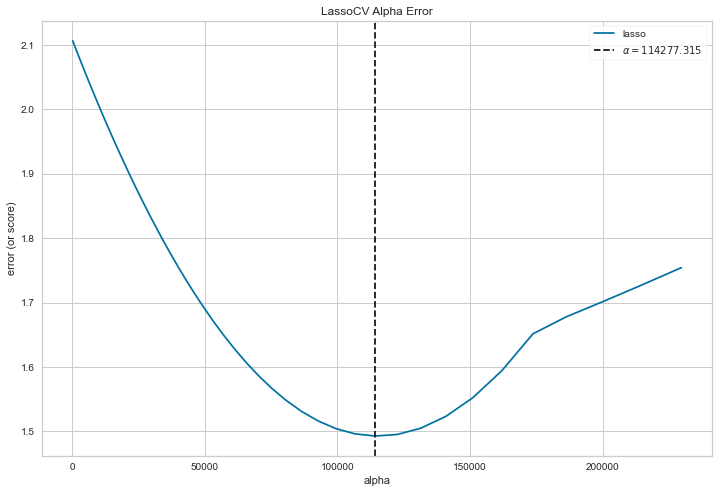

AlphaSelection(ax=<AxesSubplot:title={'center':'LassoCV Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>,
               estimator=LassoCV(random_state=0))

In [27]:
from sklearn.linear_model import LassoCV
from yellowbrick.regressor.alphas import alphas
# Use the quick method and immediately show the figure
plt.figure(figsize=(12,8))
alphas(LassoCV(random_state=0), X_train, y_train)

# Elastic Net :

In [28]:
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=1.0,random_state=0)
model.fit(X_train_scaled, y_train)
# define model evaluation method
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=0)
# evaluate model
scores = cross_val_score(model, X_train_scaled, y_train, scoring='r2', cv=cv, n_jobs=-1)
# force scores to be positive and mean
scores = absolute(scores).mean()
print("-"*53)
print("Test  R^2 Score : ", model.score(X_test_scaled, y_test))
print("Train R^2 Score : ", model.score(X_train_scaled, y_train))
print("-"*53)

-----------------------------------------------------
Test  R^2 Score :  0.043011695424416074
Train R^2 Score :  0.0599784046309757
-----------------------------------------------------


In [29]:
y_predict = model.predict(X_test_scaled)
Score['Elastic_Net']  = {'r2': r2_score(y_test, y_predict),
                  'Training_score' :r2_score(y_train, model.predict(X_train_scaled)),
                  'MAE' : mean_absolute_error(y_test, y_predict),
                  'MSE' : mean_squared_error(y_test, y_predict, squared=True),
                  'MSLE' : mean_squared_log_error(y_test, y_predict, squared=True),
                  'RMSE' : mean_squared_error(y_test, y_predict, squared=False),
                  'RMSLE' : mean_squared_log_error(y_test, y_predict, squared=False),
                  'Cross_validate' : (cross_val_score(model, X_train_scaled, y_train, cv=5)).mean()
                 }
Score

{'Ridge': {'r2': 0.5568533821107553,
  'Training_score': 0.6975267413810149,
  'MAE': 0.6637064436069302,
  'MSE': 0.7448479244755021,
  'MSLE': 0.002932792473681208,
  'RMSE': 0.8630457255994621,
  'RMSLE': 0.05415526265914706,
  'Cross_validate': 0.1197908321881099},
 'Lasso': {'r2': -0.00021789135266292448,
  'Training_score': 0.0,
  'MAE': 1.0458457825746024,
  'MSE': 1.6811822325212784,
  'MSLE': 0.006600785074830431,
  'RMSE': 1.2966041155731685,
  'RMSLE': 0.08124521570425197,
  'Cross_validate': -0.022746453217745977},
 'Elastic_Net': {'r2': 0.043011695424416074,
  'Training_score': 0.0599784046309757,
  'MAE': 1.0257885991132512,
  'MSE': 1.6085212515118545,
  'MSLE': 0.006327240978754706,
  'RMSE': 1.2682749116464673,
  'RMSLE': 0.07954395626793218,
  'Cross_validate': 0.024247158197811557}}

# Random Forest :

In [30]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100,random_state=0)

model.fit(X_train_scaled, y_train)
print("-"*53)
print("Test  R^2 Score : ", model.score(X_test_scaled, y_test))
print("Train R^2 Score : ", model.score(X_train_scaled, y_train))
print("-"*53)

-----------------------------------------------------
Test  R^2 Score :  0.7483227473432381
Train R^2 Score :  0.96720520082948
-----------------------------------------------------


In [31]:
y_predict = model.predict(X_test_scaled)
Score['Random_forest']  = {'r2': r2_score(y_test, y_predict),
                  'Training_score' :r2_score(y_train, model.predict(X_train_scaled)),
                  'MAE' : mean_absolute_error(y_test, y_predict),
                  'MSE' : mean_squared_error(y_test, y_predict, squared=True),
                  'MSLE' : mean_squared_log_error(y_test, y_predict, squared=True),
                  'RMSE' : mean_squared_error(y_test, y_predict, squared=False),
                  'RMSLE' : mean_squared_log_error(y_test, y_predict, squared=False),
                  'Cross_validate' : (cross_val_score(model, X_train_scaled, y_train, cv=5)).mean()
                 }
Score

{'Ridge': {'r2': 0.5568533821107553,
  'Training_score': 0.6975267413810149,
  'MAE': 0.6637064436069302,
  'MSE': 0.7448479244755021,
  'MSLE': 0.002932792473681208,
  'RMSE': 0.8630457255994621,
  'RMSLE': 0.05415526265914706,
  'Cross_validate': 0.1197908321881099},
 'Lasso': {'r2': -0.00021789135266292448,
  'Training_score': 0.0,
  'MAE': 1.0458457825746024,
  'MSE': 1.6811822325212784,
  'MSLE': 0.006600785074830431,
  'RMSE': 1.2966041155731685,
  'RMSLE': 0.08124521570425197,
  'Cross_validate': -0.022746453217745977},
 'Elastic_Net': {'r2': 0.043011695424416074,
  'Training_score': 0.0599784046309757,
  'MAE': 1.0257885991132512,
  'MSE': 1.6085212515118545,
  'MSLE': 0.006327240978754706,
  'RMSE': 1.2682749116464673,
  'RMSLE': 0.07954395626793218,
  'Cross_validate': 0.024247158197811557},
 'Random_forest': {'r2': 0.7483227473432381,
  'Training_score': 0.96720520082948,
  'MAE': 0.4807740199706969,
  'MSE': 0.42302315240943067,
  'MSLE': 0.001730255990897369,
  'RMSE': 0.6

## Visualisation :

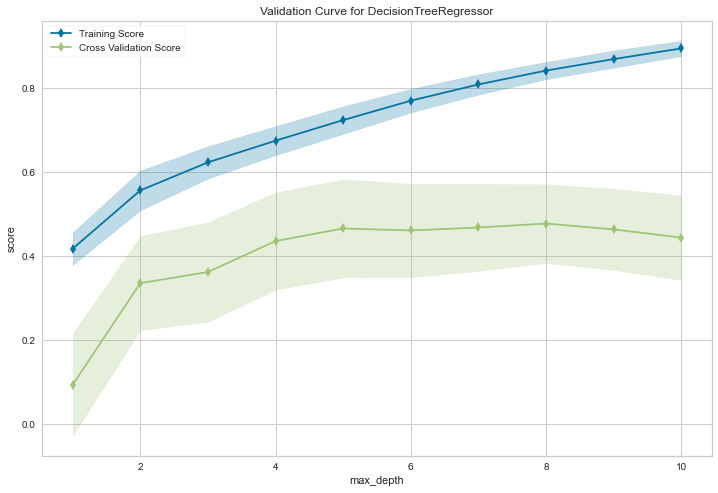

<AxesSubplot:title={'center':'Validation Curve for DecisionTreeRegressor'}, xlabel='max_depth', ylabel='score'>

In [32]:
from yellowbrick.model_selection import ValidationCurve
from sklearn.tree import DecisionTreeRegressor

viz = ValidationCurve(
    DecisionTreeRegressor(), param_name="max_depth",
    param_range=np.arange(1, 11), cv=5, scoring="r2"
)

# Fit and show the visualizer
plt.figure(figsize=(12,8))
viz.fit(X, y)
viz.show()

# Xgboost :

In [33]:
from xgboost import XGBRegressor
model = XGBRegressor(random_state=0)
model.fit(X_train_scaled, y_train)
print("-"*53)
print("Test  R^2 Score : ", model.score(X_test_scaled, y_test))
print("Train R^2 Score : ", model.score(X_train_scaled, y_train))
print("-"*53)

-----------------------------------------------------
Test  R^2 Score :  0.7969647467756604
Train R^2 Score :  0.9884321429269508
-----------------------------------------------------


In [34]:
y_predict = model.predict(X_test_scaled)
Score['xgboost']  = {'r2': r2_score(y_test, y_predict),
                  'Training_score' :r2_score(y_train, model.predict(X_train_scaled)),
                  'MAE' : mean_absolute_error(y_test, y_predict),
                  'MSE' : mean_squared_error(y_test, y_predict, squared=True),
                  'MSLE' : mean_squared_log_error(y_test, y_predict, squared=True),
                  'RMSE' : mean_squared_error(y_test, y_predict, squared=False),
                  'RMSLE' : mean_squared_log_error(y_test, y_predict, squared=False),
                  'Cross_validate' : (cross_val_score(model, X_train_scaled, y_train, cv=5)).mean()
                 }
Score

{'Ridge': {'r2': 0.5568533821107553,
  'Training_score': 0.6975267413810149,
  'MAE': 0.6637064436069302,
  'MSE': 0.7448479244755021,
  'MSLE': 0.002932792473681208,
  'RMSE': 0.8630457255994621,
  'RMSLE': 0.05415526265914706,
  'Cross_validate': 0.1197908321881099},
 'Lasso': {'r2': -0.00021789135266292448,
  'Training_score': 0.0,
  'MAE': 1.0458457825746024,
  'MSE': 1.6811822325212784,
  'MSLE': 0.006600785074830431,
  'RMSE': 1.2966041155731685,
  'RMSLE': 0.08124521570425197,
  'Cross_validate': -0.022746453217745977},
 'Elastic_Net': {'r2': 0.043011695424416074,
  'Training_score': 0.0599784046309757,
  'MAE': 1.0257885991132512,
  'MSE': 1.6085212515118545,
  'MSLE': 0.006327240978754706,
  'RMSE': 1.2682749116464673,
  'RMSLE': 0.07954395626793218,
  'Cross_validate': 0.024247158197811557},
 'Random_forest': {'r2': 0.7483227473432381,
  'Training_score': 0.96720520082948,
  'MAE': 0.4807740199706969,
  'MSE': 0.42302315240943067,
  'MSLE': 0.001730255990897369,
  'RMSE': 0.6

# SVR : 

In [35]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
model = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
model.fit(X_train_scaled, y_train)
print("-"*53)
print("Test  R^2 Score : ", model.score(X_test_scaled, y_test))
print("Train R^2 Score : ", model.score(X_train_scaled, y_train))
print("-"*53)

-----------------------------------------------------
Test  R^2 Score :  0.6064701919707023
Train R^2 Score :  0.7318109445159626
-----------------------------------------------------


In [36]:
y_predict = model.predict(X_test_scaled)
Score['SVR']  = {'r2': r2_score(y_test, y_predict),
                  'Training_score' :r2_score(y_train, model.predict(X_train_scaled)),
                  'MAE' : mean_absolute_error(y_test, y_predict),
                  'MSE' : mean_squared_error(y_test, y_predict, squared=True),
                  'MSLE' : mean_squared_log_error(y_test, y_predict, squared=True),
                  'RMSE' : mean_squared_error(y_test, y_predict, squared=False),
                  'RMSLE' : mean_squared_log_error(y_test, y_predict, squared=False),
                  'Cross_validate' : (cross_val_score(model, X_train_scaled, y_train, cv=5)).mean()
                 }
Score

{'Ridge': {'r2': 0.5568533821107553,
  'Training_score': 0.6975267413810149,
  'MAE': 0.6637064436069302,
  'MSE': 0.7448479244755021,
  'MSLE': 0.002932792473681208,
  'RMSE': 0.8630457255994621,
  'RMSLE': 0.05415526265914706,
  'Cross_validate': 0.1197908321881099},
 'Lasso': {'r2': -0.00021789135266292448,
  'Training_score': 0.0,
  'MAE': 1.0458457825746024,
  'MSE': 1.6811822325212784,
  'MSLE': 0.006600785074830431,
  'RMSE': 1.2966041155731685,
  'RMSLE': 0.08124521570425197,
  'Cross_validate': -0.022746453217745977},
 'Elastic_Net': {'r2': 0.043011695424416074,
  'Training_score': 0.0599784046309757,
  'MAE': 1.0257885991132512,
  'MSE': 1.6085212515118545,
  'MSLE': 0.006327240978754706,
  'RMSE': 1.2682749116464673,
  'RMSLE': 0.07954395626793218,
  'Cross_validate': 0.024247158197811557},
 'Random_forest': {'r2': 0.7483227473432381,
  'Training_score': 0.96720520082948,
  'MAE': 0.4807740199706969,
  'MSE': 0.42302315240943067,
  'MSLE': 0.001730255990897369,
  'RMSE': 0.6

# KNN : 

In [37]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsRegressor(n_neighbors=5)

model.fit(X_train_scaled,y_train)

print("-"*53)
print("Test  R^2 Score : ", model.score(X_test, y_test))
print("Train R^2 Score : ", model.score(X_train, y_train))
print("-"*53)

-----------------------------------------------------
Test  R^2 Score :  -12.07595223661493
Train R^2 Score :  -11.409744087803045
-----------------------------------------------------


In [38]:
model.predict(X_test_scaled)

array([14.75181864, 14.77171861, 14.42926382, 17.49445216, 15.90385762,
       14.33677839, 14.83910374, 15.08232518, 15.27520724, 13.9475351 ,
       16.03429518, 15.70147272, 15.11586742, 14.02650707, 17.42543426,
       14.37362029, 16.11658268, 15.81134278, 14.65239421, 13.83685665,
       14.54080603, 14.2521355 , 14.76137558, 14.49702738, 13.92087357,
       12.5679726 , 14.72957559, 13.91647324, 13.85505398, 15.9985275 ,
       15.45344943, 14.56873452, 15.63268504, 14.15030333, 15.19225801,
       15.61698835, 15.19426999, 14.81284769, 14.58744871, 14.57634301,
       14.65806868, 14.86621621, 15.26631524, 15.20590511, 13.89581199,
       15.75183617, 16.32080151, 16.07522829, 12.88716569, 13.31102442,
       14.58249787, 15.6513429 , 14.5133248 , 15.91880746, 15.27030913,
       12.95396236, 15.64216867, 13.73056572, 15.75338908, 14.79444244,
       15.45955658, 17.0175867 , 13.11114168, 14.46648006, 14.81284769,
       13.61892696, 16.67434399, 14.72931396, 14.67899221, 13.89

In [39]:
y_predict = model.predict(X_test_scaled)
Score['KNN']  = {'r2': r2_score(y_test, y_predict),
                  'Training_score' :r2_score(y_train, model.predict(X_train_scaled)),
                  'MAE' : mean_absolute_error(y_test, y_predict),
                  'MSE' : mean_squared_error(y_test, y_predict, squared=True),
                  'MSLE' : mean_squared_log_error(y_test, y_predict, squared=True),
                  'RMSE' : mean_squared_error(y_test, y_predict, squared=False),
                  'RMSLE' : mean_squared_log_error(y_test, y_predict, squared=False),
                  'Cross_validate' : (cross_val_score(model, X_train_scaled, y_train, cv=5)).mean()
                 }
Score

{'Ridge': {'r2': 0.5568533821107553,
  'Training_score': 0.6975267413810149,
  'MAE': 0.6637064436069302,
  'MSE': 0.7448479244755021,
  'MSLE': 0.002932792473681208,
  'RMSE': 0.8630457255994621,
  'RMSLE': 0.05415526265914706,
  'Cross_validate': 0.1197908321881099},
 'Lasso': {'r2': -0.00021789135266292448,
  'Training_score': 0.0,
  'MAE': 1.0458457825746024,
  'MSE': 1.6811822325212784,
  'MSLE': 0.006600785074830431,
  'RMSE': 1.2966041155731685,
  'RMSLE': 0.08124521570425197,
  'Cross_validate': -0.022746453217745977},
 'Elastic_Net': {'r2': 0.043011695424416074,
  'Training_score': 0.0599784046309757,
  'MAE': 1.0257885991132512,
  'MSE': 1.6085212515118545,
  'MSLE': 0.006327240978754706,
  'RMSE': 1.2682749116464673,
  'RMSLE': 0.07954395626793218,
  'Cross_validate': 0.024247158197811557},
 'Random_forest': {'r2': 0.7483227473432381,
  'Training_score': 0.96720520082948,
  'MAE': 0.4807740199706969,
  'MSE': 0.42302315240943067,
  'MSLE': 0.001730255990897369,
  'RMSE': 0.6

## Visualisation :

In [40]:
"""cv = 5
param_range = np.arange(3, 20, 2)

oz = ValidationCurve(
    KNeighborsRegressor(), param_name="n_neighbors",
    param_range=param_range, cv=cv, scoring="r2", n_jobs=-1,
)

# Using the same game dataset as in the SVC example
plt.figure(figsize=(12,8))
oz.fit(X_train, y_train)
oz.show()"""

'cv = 5\nparam_range = np.arange(3, 20, 2)\n\noz = ValidationCurve(\n    KNeighborsRegressor(), param_name="n_neighbors",\n    param_range=param_range, cv=cv, scoring="r2", n_jobs=-1,\n)\n\n# Using the same game dataset as in the SVC example\nplt.figure(figsize=(12,8))\noz.fit(X_train, y_train)\noz.show()'

# Linear Regression : 

In [41]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X_train_scaled, y_train)
print("-"*53)
print("Test  R^2 Score : ", lin.score(X_test_scaled, y_test))
print("Train R^2 Score : ", lin.score(X_train_scaled, y_train))
print("-"*53)

-----------------------------------------------------
Test  R^2 Score :  -2.0016182895477092e+26
Train R^2 Score :  0.6913132413671117
-----------------------------------------------------


In [42]:
# Transformation inverse pour calculer les métriques pour revenir aux vraies valeurs (revenir quasiment à la même chose)

In [43]:
y_predict = lin.predict(X_test_scaled)
Score['Linear_Regression']  = {
    'r2': r2_score(y_test, y_predict),
    'Training_score' :r2_score(y_train, model.predict(X_train_scaled)),
    'MAE' : mean_absolute_error(y_test, y_predict),
    'MSE' : mean_squared_error(y_test, y_predict, squared=True),
   # 'MSLE' : mean_squared_log_error(y_test, y_predict, squared=True),
    'RMSE' : mean_squared_error(y_test, y_predict, squared=False),
   # 'RMSLE' : mean_squared_log_error(y_test, y_predict, squared=False),
    'Cross_validate' : (cross_val_score(model, X_train_scaled, y_train, cv=5)).mean()
}
Score

{'Ridge': {'r2': 0.5568533821107553,
  'Training_score': 0.6975267413810149,
  'MAE': 0.6637064436069302,
  'MSE': 0.7448479244755021,
  'MSLE': 0.002932792473681208,
  'RMSE': 0.8630457255994621,
  'RMSLE': 0.05415526265914706,
  'Cross_validate': 0.1197908321881099},
 'Lasso': {'r2': -0.00021789135266292448,
  'Training_score': 0.0,
  'MAE': 1.0458457825746024,
  'MSE': 1.6811822325212784,
  'MSLE': 0.006600785074830431,
  'RMSE': 1.2966041155731685,
  'RMSLE': 0.08124521570425197,
  'Cross_validate': -0.022746453217745977},
 'Elastic_Net': {'r2': 0.043011695424416074,
  'Training_score': 0.0599784046309757,
  'MAE': 1.0257885991132512,
  'MSE': 1.6085212515118545,
  'MSLE': 0.006327240978754706,
  'RMSE': 1.2682749116464673,
  'RMSLE': 0.07954395626793218,
  'Cross_validate': 0.024247158197811557},
 'Random_forest': {'r2': 0.7483227473432381,
  'Training_score': 0.96720520082948,
  'MAE': 0.4807740199706969,
  'MSE': 0.42302315240943067,
  'MSLE': 0.001730255990897369,
  'RMSE': 0.6

# DataFrame des Scores des Algos :

In [44]:
df_final = pd.DataFrame.from_dict(Score, orient='index')
df_final = df_final.sort_values(by=['r2'], ascending = False)
df_final_2 = df_final.sort_values(by=['Cross_validate'], ascending = False)
df_final_3 = df_final.sort_values(by=['Training_score'], ascending = False)
print("-"*80)
print(" "*30,'\033[1m' + "Classement par R2 :" + '\033[0m')
print("-"*80)
display(df_final)
print("")
print("-"*80)
print(" "*20,'\033[1m' + "Classement par Validation Croisée :" + '\033[0m')
print("-"*80)
display(df_final_2)
print("")
print("-"*80)
print(" "*20, '\033[1m' + "Classement par Score d'entrainement :" + '\033[0m')
print("-"*80)
display(df_final_3)
# Utiliser les log MSLE + RMSLE pour avoir un vrai indicateur explicable
## Score Training 

--------------------------------------------------------------------------------
                               Classement par R2 :
--------------------------------------------------------------------------------


,r2,Training_score,MAE,MSE,MSLE,RMSE,RMSLE,Cross_validate
xgboost,7.969647e-01,0.988432,4.279985e-01,3.412649e-01,0.001400,5.841788e-01,0.037410,0.798211
Random_forest,7.483227e-01,0.967205,4.807740e-01,4.230232e-01,0.001730,6.504023e-01,0.041596,0.755819
SVR,6.064702e-01,0.731811,6.210269e-01,6.614512e-01,0.002652,8.132965e-01,0.051495,0.543726
Ridge,5.568534e-01,0.697527,6.637064e-01,7.448479e-01,0.002933,8.630457e-01,0.054155,0.119791
KNN,4.124183e-01,0.640472,7.655634e-01,9.876167e-01,0.003870,9.937891e-01,0.062209,0.432799
Elastic_Net,4.301170e-02,0.059978,1.025789e+00,1.608521e+00,0.006327,1.268275e+00,0.079544,0.024247
Lasso,-2.178914e-04,0.000000,1.045846e+00,1.681182e+00,0.006601,1.296604e+00,0.081245,-0.022746
Linear_Regression,-2.001618e+26,0.640472,1.409593e+12,3.364352e+26,NaN,1.834217e+13,NaN,0.432799



--------------------------------------------------------------------------------
                     Classement par Validation Croisée :
--------------------------------------------------------------------------------


,r2,Training_score,MAE,MSE,MSLE,RMSE,RMSLE,Cross_validate
xgboost,7.969647e-01,0.988432,4.279985e-01,3.412649e-01,0.001400,5.841788e-01,0.037410,0.798211
Random_forest,7.483227e-01,0.967205,4.807740e-01,4.230232e-01,0.001730,6.504023e-01,0.041596,0.755819
SVR,6.064702e-01,0.731811,6.210269e-01,6.614512e-01,0.002652,8.132965e-01,0.051495,0.543726
KNN,4.124183e-01,0.640472,7.655634e-01,9.876167e-01,0.003870,9.937891e-01,0.062209,0.432799
Linear_Regression,-2.001618e+26,0.640472,1.409593e+12,3.364352e+26,NaN,1.834217e+13,NaN,0.432799
Ridge,5.568534e-01,0.697527,6.637064e-01,7.448479e-01,0.002933,8.630457e-01,0.054155,0.119791
Elastic_Net,4.301170e-02,0.059978,1.025789e+00,1.608521e+00,0.006327,1.268275e+00,0.079544,0.024247
Lasso,-2.178914e-04,0.000000,1.045846e+00,1.681182e+00,0.006601,1.296604e+00,0.081245,-0.022746



--------------------------------------------------------------------------------
                     Classement par Score d'entrainement :
--------------------------------------------------------------------------------


,r2,Training_score,MAE,MSE,MSLE,RMSE,RMSLE,Cross_validate
xgboost,7.969647e-01,0.988432,4.279985e-01,3.412649e-01,0.001400,5.841788e-01,0.037410,0.798211
Random_forest,7.483227e-01,0.967205,4.807740e-01,4.230232e-01,0.001730,6.504023e-01,0.041596,0.755819
SVR,6.064702e-01,0.731811,6.210269e-01,6.614512e-01,0.002652,8.132965e-01,0.051495,0.543726
Ridge,5.568534e-01,0.697527,6.637064e-01,7.448479e-01,0.002933,8.630457e-01,0.054155,0.119791
KNN,4.124183e-01,0.640472,7.655634e-01,9.876167e-01,0.003870,9.937891e-01,0.062209,0.432799
Linear_Regression,-2.001618e+26,0.640472,1.409593e+12,3.364352e+26,NaN,1.834217e+13,NaN,0.432799
Elastic_Net,4.301170e-02,0.059978,1.025789e+00,1.608521e+00,0.006327,1.268275e+00,0.079544,0.024247
Lasso,-2.178914e-04,0.000000,1.045846e+00,1.681182e+00,0.006601,1.296604e+00,0.081245,-0.022746


Nos données nétant pas des données linéaires, nous ne pouvons pas utiliser le MSLE et le RMSLE car elles sont négatives, la confirmation venant du r2.

# Choix de l'algo et optimisation :

Le choix se porte sur Xgboost, car il est le meilleure en R2 ainsi qu'en cross-validation.

In [45]:
## Optimiser et améliorer les hyperparamétres de test de Xgboost avec Energy Star Score
## Comparer l'impact

## Algo optimisé avec Energy Star Score :

In [46]:
from sklearn.model_selection import RandomizedSearchCV

In [47]:
regressor = XGBRegressor()

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': [100, 400, 800],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.05, 0.1, 0.20],
    'min_child_weight': [1, 10, 100]
    }

# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
                               param_distributions=hyperparameter_grid,
                               cv=5, 
                               n_iter=50,
                               scoring = 'r2',n_jobs = -1,
                               return_train_score = True,
                               random_state=0)

random_cv.fit(X_train_scaled, y_train)

display(random_cv.best_estimator_)
display(random_cv.cv_results_)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=800, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

{'mean_fit_time': array([5.22146945, 0.57462454, 2.04273081, 3.14640322, 4.92423964,
        4.15964642, 0.43345013, 1.72344427, 5.10228577, 5.06752529,
        9.1394649 , 0.61924438, 1.04499002, 0.4234942 , 3.50772033,
        3.5967052 , 0.4775867 , 0.82549324, 6.41746011, 0.42819781,
        0.61951714, 1.6621871 , 4.57433724, 4.96974101, 3.16031418,
        2.49014683, 1.7178246 , 1.16353326, 4.98669481, 0.80409002,
        3.36839037, 0.42839856, 3.40870571, 6.49944491, 3.4644042 ,
        1.68035698, 1.72623839, 6.36136317, 0.42207837, 9.32250681,
        3.32415438, 2.03378763, 1.09886665, 0.62227058, 1.73221455,
        3.42726641, 6.7621891 , 7.3193759 , 3.18404007, 4.56257114]),
 'std_fit_time': array([0.01235136, 0.02137403, 0.1614525 , 0.04319962, 0.0677887 ,
        0.09240264, 0.00585694, 0.01103868, 0.06640317, 0.09043273,
        0.03079813, 0.03036794, 0.00400208, 0.00362025, 0.06372136,
        0.04296834, 0.06223296, 0.02933848, 0.03739733, 0.02957113,
        0.008

In [48]:
regressor = XGBRegressor(**random_cv.best_params_)

regressor.fit(X_train_scaled, y_train)
y_pred = regressor.predict(X_test_scaled)
print("-"*53)
print("Test  R^2 Score : ", regressor.score(X_test_scaled, y_test))
print("Train R^2 Score : ", regressor.score(X_train_scaled, y_train))
print("-"*53)

-----------------------------------------------------
Test  R^2 Score :  0.8141918296466482
Train R^2 Score :  0.9388739370122755
-----------------------------------------------------


In [49]:
Visualisation_r2 = {}
y_predict = regressor.predict(X_test_scaled)
Visualisation_r2['Avec_params/avec_EnergyStarScore']  = {'r2': r2_score(y_test, y_predict),
                  'Training_score' :r2_score(y_train, regressor.predict(X_train_scaled)),
                  'MAE' : mean_absolute_error(y_test, y_predict),
                  'MSE' : mean_squared_error(y_test, y_predict, squared=True),
                  'MSLE' : mean_squared_log_error(y_test, y_predict, squared=True),
                  'RMSE' : mean_squared_error(y_test, y_predict, squared=False),
                  'RMSLE' : mean_squared_log_error(y_test, y_predict, squared=False),
                  'Cross_validate' : (cross_val_score(regressor, X_train_scaled, y_train, cv=5)).mean()
                 }
Visualisation_r2

{'Avec_params/avec_EnergyStarScore': {'r2': 0.8141918296466482,
  'Training_score': 0.9388739370122755,
  'MAE': 0.4074199473313564,
  'MSE': 0.3123093451496782,
  'MSLE': 0.0012744658692766817,
  'RMSE': 0.5588464414753647,
  'RMSLE': 0.03569966203308768,
  'Cross_validate': 0.8265675212240877}}

In [50]:
# On peut voir qu'on gagne légérement en r2 en utilisant les hyper paraméters.

In [51]:
#pip install scikit-plot # librairie
import scikitplot as sck

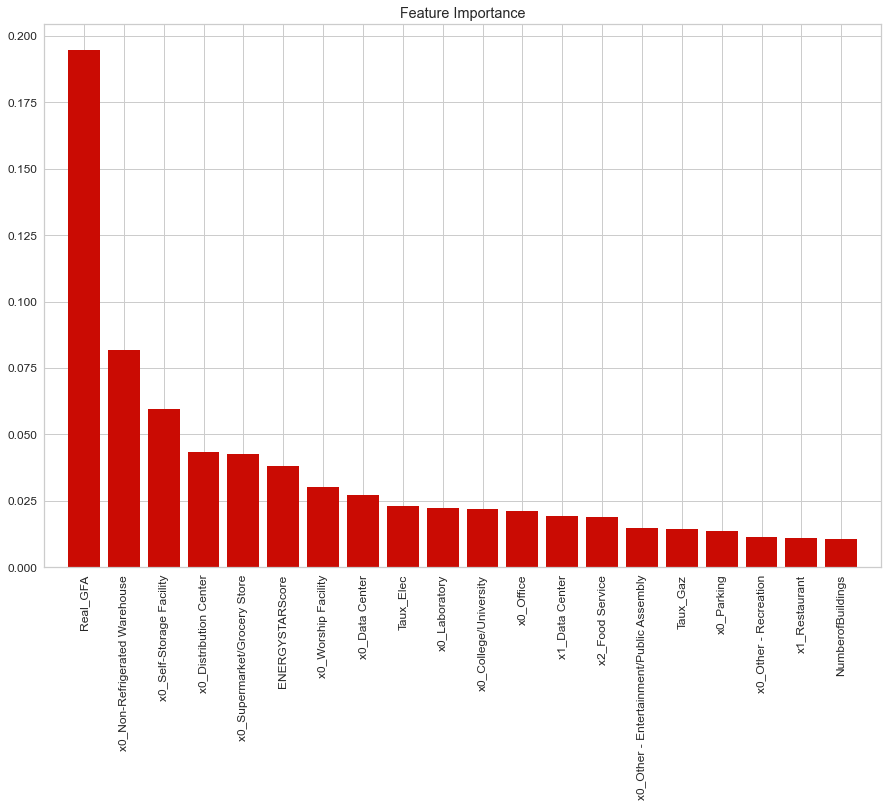

In [52]:
fig, ax = plt.subplots(figsize=(15,10))
sck.estimators.plot_feature_importances(random_cv.best_estimator_, feature_names = X.columns,ax=ax)
plt.xticks(rotation=90)
plt.show()

## Algo optimisé sans Energy Star Score :

In [53]:
# Maintenant on va réutiliser nos paramétres en supprimant l'energy Star Score.

In [54]:
y = numerical_features['SiteEnergyUse(kBtu)']
X = numerical_features.drop(['SiteEnergyUse(kBtu)','ENERGYSTARScore'],axis=1)
#y = np.log(y)
X_train, X_test, y_train, y_test = \
train_test_split(X,
                 y,
                 test_size=0.33, # 33% des données dans le jeu de test
                 random_state = 0
                )
# Centrage et Réduction
col = X_test.columns
std_scale = StandardScaler().fit(X_train)
X_train_scaled = std_scale.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=col, index=X_train.index )
X_test_scaled = std_scale.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=col, index=X_test.index)
#y_train_log = np.exp(y_train) a tester 
#y_test_log = np.exp(y_test) a tester

In [55]:
regressor = XGBRegressor()
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': [100, 400, 800],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.05, 0.1, 0.20],
    'min_child_weight': [1, 10, 100]
    }

# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
                               param_distributions=hyperparameter_grid,
                               cv=5, 
                               n_iter=50,
                               scoring = 'neg_mean_absolute_error',n_jobs = -1,
                               return_train_score = True,
                               random_state=0)

random_cv.fit(X_train_scaled, y_train)

display(random_cv.best_estimator_)
display(random_cv.cv_results_)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

{'mean_fit_time': array([ 5.01647677,  0.5333323 ,  1.78159537,  3.23717031,  5.08573465,
         9.74195342,  0.43347788,  1.73418212,  5.40182781,  5.61165853,
        10.57200398,  0.89660354,  1.36646361,  0.53981433,  5.21312532,
         3.79619074,  0.45542216,  0.954318  ,  7.66480942,  0.54466882,
         0.84359155,  2.04420581,  4.9439312 ,  5.29478054,  3.15051985,
         2.71478128,  1.79046769,  1.24132876,  5.12939086,  0.81407485,
         3.27962685,  0.42434058,  3.42605495,  6.66829448,  3.59221997,
         1.7171968 ,  1.83015294,  7.14660897,  0.48018594, 10.49211125,
         3.65847254,  2.05744562,  1.29907904,  0.72649903,  1.85470657,
         3.86745906,  7.59722185,  7.93793559,  3.2739655 ,  5.62455983]),
 'std_fit_time': array([0.024793  , 0.03780121, 0.06185968, 0.09255656, 0.09149677,
        0.08201638, 0.00484537, 0.05352373, 0.12970278, 0.1562727 ,
        0.16907248, 0.02550771, 0.02880686, 0.05778173, 0.08867665,
        0.194035  , 0.0265381 ,

In [56]:
regressor_v2 = XGBRegressor(**random_cv.best_params_)

regressor_v2.fit(X_train_scaled, y_train)
y_pred = regressor_v2.predict(X_test_scaled)
print("-"*53)
print("Test  R^2 Score : ", regressor_v2.score(X_test_scaled, y_test))
print("Train R^2 Score : ", regressor_v2.score(X_train_scaled, y_train))
print("-"*53)

-----------------------------------------------------
Test  R^2 Score :  0.46816585705843916
Train R^2 Score :  0.9988148727219016
-----------------------------------------------------


In [57]:
y_predict = regressor_v2.predict(X_test_scaled)
Visualisation_r2['Avec_params/sans_EnergyStarScore']  = {'r2': r2_score(y_test, y_predict),
                  'Training_score' :r2_score(y_train, regressor_v2.predict(X_train_scaled)),
                  'MAE' : mean_absolute_error(y_test, y_predict),
                  'MSE' : mean_squared_error(y_test, y_predict, squared=True),
                  #'MSLE' : mean_squared_log_error(y_test, y_predict, squared=True),
                  'RMSE' : mean_squared_error(y_test, y_predict, squared=False),
                  #'RMSLE' : mean_squared_log_error(y_test, y_predict, squared=False),
                  'Cross_validate' : (cross_val_score(regressor_v2, X_train_scaled, y_train, cv=5)).mean()
                 }
Visualisation_r2

{'Avec_params/avec_EnergyStarScore': {'r2': 0.8141918296466482,
  'Training_score': 0.9388739370122755,
  'MAE': 0.4074199473313564,
  'MSE': 0.3123093451496782,
  'MSLE': 0.0012744658692766817,
  'RMSE': 0.5588464414753647,
  'RMSLE': 0.03569966203308768,
  'Cross_validate': 0.8265675212240877},
 'Avec_params/sans_EnergyStarScore': {'r2': 0.46816585705843916,
  'Training_score': 0.9988148727219016,
  'MAE': 4040873.202187728,
  'MSE': 106393689314791.28,
  'RMSE': 10314731.664701283,
  'Cross_validate': 0.2666135776582689}}

In [58]:
Visualisation_r2['Sans_params/avec_EnergyStarScore'] = Score['xgboost']               
Visualisation_r2['Avec_params/avec_EnergyStarScore'] = Visualisation_r2['Avec_params/avec_EnergyStarScore']
Visualisation_r2['Avec_params/sans_EnergyStarScore'] = Visualisation_r2['Avec_params/sans_EnergyStarScore'] 
Visualisation_r2

{'Avec_params/avec_EnergyStarScore': {'r2': 0.8141918296466482,
  'Training_score': 0.9388739370122755,
  'MAE': 0.4074199473313564,
  'MSE': 0.3123093451496782,
  'MSLE': 0.0012744658692766817,
  'RMSE': 0.5588464414753647,
  'RMSLE': 0.03569966203308768,
  'Cross_validate': 0.8265675212240877},
 'Avec_params/sans_EnergyStarScore': {'r2': 0.46816585705843916,
  'Training_score': 0.9988148727219016,
  'MAE': 4040873.202187728,
  'MSE': 106393689314791.28,
  'RMSE': 10314731.664701283,
  'Cross_validate': 0.2666135776582689},
 'Sans_params/avec_EnergyStarScore': {'r2': 0.7969647467756604,
  'Training_score': 0.9884321429269508,
  'MAE': 0.42799848602923674,
  'MSE': 0.34126490162518675,
  'MSLE': 0.0013995330342351632,
  'RMSE': 0.584178826751866,
  'RMSLE': 0.03741033325479958,
  'Cross_validate': 0.7982111526281837}}

In [59]:
df_r2 = pd.DataFrame.from_dict(Visualisation_r2, orient='index')
df_r2 = df_r2.sort_values(by=['r2'], ascending = False)
df_r2

,r2,Training_score,MAE,MSE,MSLE,RMSE,RMSLE,Cross_validate
Avec_params/avec_EnergyStarScore,0.814192,0.938874,4.074199e-01,3.123093e-01,0.001274,5.588464e-01,0.03570,0.826568
Sans_params/avec_EnergyStarScore,0.796965,0.988432,4.279985e-01,3.412649e-01,0.001400,5.841788e-01,0.03741,0.798211
Avec_params/sans_EnergyStarScore,0.468166,0.998815,4.040873e+06,1.063937e+14,NaN,1.031473e+07,NaN,0.266614


In [60]:
round((0.814192 - 0.731129)*100,2)

8.31

In [61]:
# On peut voir qu'en retirant l'EnergyStarScore on perds environ 8% de r2 ce qui reste négligeable au vu de notre score relativement élevé.